**4. Tarea 4: Modelamiento**

>4.1 Particionamiento del conjunto de datos en entrenamiento y prueba


Modelamiento con Variable Y normalizada

 >4.2 Entrenamiento de un primer modelo de regresión lineal

  >>4.2.1 Validación Cuantitativa

  >>4.2.2 Validación Cualitativa

 >4.3 Entrenamiento de un segundo modelo aplicando regularización

  >>4.3.1 Validación Cuantitativa

  >>4.3.2 Validación Cualitativa

 >4.4 Entrenamiento de un tercer modelo aplicando Bagging

  >>4.4.1 Validación Cuantitativa

  >>4.4.2 Validación Cualitativa


Modelamiento con Variable Y sin normalización

 >4.2 Entrenamiento de un primer modelo de regresión lineal

  >>4.2.1 Validación Cuantitativa

  >>4.2.2 Validación Cualitativa

 >4.3 Entrenamiento de un segundo modelo aplicando regularización

  >>4.3.1 Validación Cuantitativa

  >>4.3.2 Validación Cualitativa

 >>4.4 Entrenamiento de un tercer modelo aplicando Bagging

  >>4.4.1 Validación Cuantitativa

  >>4.4.2 Validación Cualitativa


In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats
from sklearn.linear_model import Lasso

/var/folders/0_/th2rpmh97_l2bfdwmjhwgng00000gn/T/ipykernel_15759/4245219705.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

### Carga de datos

In [2]:
data_df = pd.read_csv("clean_data.txt", sep=',')
data_df.head()

,Unnamed: 0,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity,...,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_1,no_of_style_change_2
0,0,0.80,26.16,1108.000000,7080,98,0.0,0,59.0,0.940725,...,0,0,0,1,0,0,0,0,0,0
1,1,0.75,3.94,974.025424,960,0,0.0,0,8.0,0.886500,...,0,0,0,0,0,0,0,0,0,0
2,2,0.80,11.41,968.000000,3660,50,0.0,0,30.5,0.800570,...,0,0,0,0,0,0,1,0,0,0
3,3,0.80,11.41,968.000000,3660,50,0.0,0,30.5,0.800570,...,0,0,0,0,0,0,0,1,0,0
4,4,0.80,25.90,1170.000000,1920,50,0.0,0,56.0,0.800382,...,0,1,0,0,0,0,0,0,0,0


In [6]:
data_df_modeling =data_df.copy()

## Tarea 4: Modelamiento Y no escalada

### 4.1 Particionamiento del conjunto de datos en entrenamiento y prueba

Se desea construir un modelo que se ajuste bien a los datos de entrenamiento, pero que además se comporte de forma similar con datos previamente desconocidos.
Metodológicamente, una práctica común para validar esto es separando el conjunto de datos etiquetado en dos partes: entrenamiento y prueba. La proporción reservada para probar el modelo es definida por el analista, pero un valor común es 30%.

In [27]:
#Separar variables indepnedientes y de interes
X = data_df_modeling.drop("PUNT_GLOBAL", axis=1)
Y = data_df_modeling["PUNT_GLOBAL"]

In [28]:
#Normalizar variables númericas: features_numericas
#features_numericas_wiyhout_y= features_numericas

In [29]:
#Separamos las muestras
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#Escalamiento
# Inicializar el objeto StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

#Escalamiento en X
#X_train[features_numericas] = scaler_X.fit_transform(X_train[features_numericas])
#X_test[features_numericas] = scaler_X.transform(X_test[features_numericas])

#Adecuamos a numpy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

#Desviacion original
print("Std de y: ",np.std(y_train, axis=0) )

#Escalamiento en Y
#y_train= scaler_y.fit_transform(y_train)
#y_test = scaler_y.transform(y_test)

#Imprimimos dimensiones
print("Train shape:  ",X_train.shape, y_train.shape)
print("Test shape:  ",X_test.shape, y_test.shape)

#Media y desvest
print("Media de X_train_scaled:", np.mean(X_train, axis=0))
print("Media de y_train_scaled:", np.mean(y_train, axis=0))



Std de y:  [0.17506332]
Train shape:   (837, 33) (837, 1)
Test shape:   (360, 33) (360, 1)
Media de X_train_scaled: [ 6.08397849e+02  4.07479705e-16  7.21578644e-17  8.91361855e-17
  3.39566421e-17  4.18339307e+01 -6.36687039e-18  1.16725957e-17
  2.65286266e-17  2.90322581e-01  1.64874552e-01  2.03106332e-01
  3.82317802e-02  2.12664277e-01  5.60334528e-01  1.51732378e-01
  1.67264038e-01  1.72043011e-01  1.72043011e-01  1.70848268e-01
  1.06332139e-01  8.24372760e-02  8.96057348e-02  7.76583035e-02
  7.28793309e-02  8.24372760e-02  8.96057348e-02  8.72162485e-02
  6.81003584e-02  7.28793309e-02  8.36320191e-02  1.01553166e-01
  2.62843489e-02]
Media de y_train_scaled: [0.73422872]


### 4.2 Entrenamiento de un primer modelo de regresión lineal

Se dice que la regresión es lineal dado que se asume una relación lineal entre las variables de entrada (features) y la variable objetivo (target).
En Scikit-Learn existen varias formas de implementar el algoritmo de regresión lieal, pero dado que el objetivo de esta practica esta enfocado en el análisis del modelo resultante y no tanto del algoritmo o del proceso de entrenamiento, se utilizará la implementación más sencilla dada por la clase LinearRegression.

In [30]:
# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

coeficientes=model.coef_[0]
features = X.columns

for i, feature in enumerate(features):
  print(f"Coeficiente de {feature}: {coeficientes[i]}")

print(f"\nIntercepto: {model.intercept_[0]}")

Coeficiente de Unnamed: 0: -1.3654793636806264e-05
Coeficiente de targeted_productivity: 0.06351424728037393
Coeficiente de smv: -0.08444678291197638
Coeficiente de wip: 0.00451155586839077
Coeficiente de over_time: -0.020066477830438405
Coeficiente de incentive: 4.022112764217462e-05
Coeficiente de idle_time: -0.0007639930185329531
Coeficiente de idle_men: -0.02630645823827809
Coeficiente de no_of_workers: 0.14901596512866436
Coeficiente de quarter_Quarter2: 0.0039055082335041303
Coeficiente de quarter_Quarter3: -0.005115634632163805
Coeficiente de quarter_Quarter4: -0.012962877749873035
Coeficiente de quarter_Quarter5: 0.08194014598559198
Coeficiente de department_finishing : 0.05947794657363924
Coeficiente de department_sweing: -0.08178577031211255
Coeficiente de day_Saturday: 0.035528873797912294
Coeficiente de day_Sunday: 0.006014070715385733
Coeficiente de day_Thursday: -0.01474419682653681
Coeficiente de day_Tuesday: 0.02727273278764001
Coeficiente de day_Wednesday: 0.0039098813

**Validación Cuantitativa**

In [31]:
# Obtener las predicciones para el set Train
y_pred = model.predict(X_train)
y_train_original = y_train

# MAE
mae = mean_absolute_error(y_train_original, y_pred)
# MSE
mse = mean_squared_error(y_train_original, y_pred)
# RMSE
rmse = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", model.score(X_train,y_train))

MAE: 0.10099542501678548
MSE: 0.018965633985371863
RMSE: 0.13771577246405678
R2: 0.38116191711413383


In [32]:
# Obtener las predicciones para el set Tes
y_pred_test = model.predict(X_test)
y_test_original = y_test

# MAE
mae = mean_absolute_error(y_test_original, y_pred_test)
# MSE
mse = mean_squared_error(y_test_original, y_pred_test)
# RMSE
rmse = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", model.score(X_test,y_test))

MAE: 0.11279958087724001
MSE: 0.023914199037931762
RMSE: 0.15464216448928722
R2: 0.19987450274111374


**Validación Cualitativa**

In [33]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

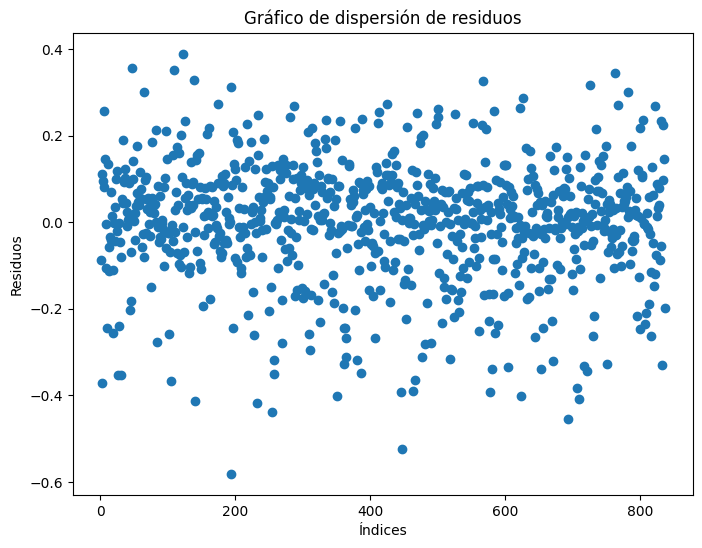

In [34]:
#residuos de la prediccion
residuals = y_train - y_pred
indices = list(range(1, len(y_train)+1))

# Crear una figura y ejes
plt.figure(figsize=(8, 6))

# Graficar los residuos
plt.scatter(indices, residuals)

# Agregar etiquetas y título
plt.xlabel('Índices')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión de residuos')

# Mostrar la gráfica
plt.show()

### 4.3 Entrenamiento de un segundo modelo de regresión lineal (LASSO)

In [35]:
# Crear el modelo
model_lasso = Lasso(alpha=0.01)

# Entrenar el modelo
model_lasso.fit(X_train, y_train)

# Initialize an empty list to store selected features
selected_features = []
selected_features_index = []
feature_names = X.columns
for i, feature in enumerate(feature_names):
  if abs(model_lasso.coef_[i]) > 0.0001:
    selected_features.append(feature)
    selected_features_index.append(i)
    print(f"Coeficiente de {feature}: {model_lasso.coef_[i]}")

print("Intercept: ", model_lasso.intercept_[0])

Coeficiente de targeted_productivity: 0.06230959504874976
Coeficiente de smv: -0.0070669527410575994
Coeficiente de idle_men: -0.02078167091980437
Intercept:  0.7670013133563829


**Validación Cuantitativa**

In [36]:
# Obtener las predicciones para el set Train
y_pred_lasso = model_lasso.predict(X_train).reshape(-1,1)
y_train_original = y_train
# MAE
mae_lasso  = mean_absolute_error(y_train_original, y_pred_lasso)
# MSE
mse_lasso  = mean_squared_error(y_train_original, y_pred_lasso)
# RMSE
rmse_lasso  = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)
print("R2:", model_lasso.score(X_train,y_train))

MAE: 0.11065301181935032
MSE: 0.023440008375778663
RMSE: 0.15464216448928722
R2: 0.23516557066936883


In [37]:
# Obtener las predicciones para el set Test
y_pred_test_lasso = model_lasso.predict(X_test)
y_test_original = y_test
# MAE
mae_lasso = mean_absolute_error(y_test_original, y_pred_test_lasso)
# MSE
mse_lasso = mean_squared_error(y_test_original, y_pred_test_lasso)
# RMSE
rmse_lasso = np.sqrt(mse)
# Imprimir los resultados
print("MAE:", mae_lasso)
print("MSE:", mse_lasso)
print("RMSE:", rmse_lasso)
print("R2:", model_lasso.score(X_test,y_test))

MAE: 0.11153392273877843
MSE: 0.0248742274119038
RMSE: 0.15464216448928722
R2: 0.1677537037593615


**Validación Cualitativa**

In [40]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

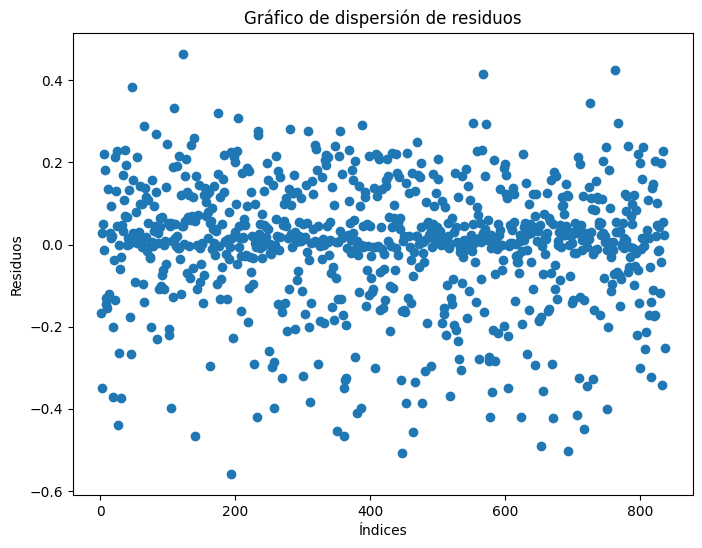

In [41]:
#residuos de la prediccion
residuals = y_train - y_pred_lasso.reshape(-1, 1)
indices = list(range(1, len(y_train)+1))

# Crear una figura y ejes
plt.figure(figsize=(8, 6))

# Graficar los residuos
plt.scatter(indices, residuals)

# Agregar etiquetas y título
plt.xlabel('Índices')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión de residuos')

# Mostrar la gráfica
plt.show()

### 4.4 Entrenamiento de un tercer modelo de regresión lineal (BAGGING)

In [42]:
from sklearn.ensemble import BaggingRegressor

# Crear el modelo base (Lasso)
model = LinearRegression()

# Crear el modelo Bagging con Lasso como estimador base
bagging_lasso = BaggingRegressor(base_estimator=model, n_estimators=15, random_state=42)

# Entrenar el modelo Bagging
bagging_lasso.fit(X_train[:, selected_features_index], y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=LinearRegression(), n_estimators=15,
                 random_state=42)

**Validación Cuantitativa**

In [43]:
# Obtener las predicciones para el conjunto de entrenamiento
y_pred_train_bagging = bagging_lasso.predict(X_train[:, selected_features_index])
y_train_original = y_train

# Calcular las métricas de evaluación para el conjunto de entrenamiento
mae_train_bagging = mean_absolute_error(y_train_original, y_pred_train_bagging)
mse_train_bagging = mean_squared_error(y_train_original, y_pred_train_bagging)
rmse_train_bagging = np.sqrt(mse_train_bagging)
r2_train_bagging = bagging_lasso.score(X_train[:, selected_features_index], y_train)


# Imprimir las métricas de evaluación
print("Métricas de evaluación para el conjunto de entrenamiento:")
print("MAE:", mae_train_bagging)
print("MSE:", mse_train_bagging)
print("RMSE:", rmse_train_bagging)
print("R2:", r2_train_bagging)

Métricas de evaluación para el conjunto de entrenamiento:
MAE: 0.10825737199933119
MSE: 0.023598703632859375
RMSE: 0.15361869558377123
R2: 0.22998743274207067


In [44]:
# Obtener las predicciones para el conjunto de prueba
y_pred_test_bagging = bagging_lasso.predict(X_test[:, selected_features_index])
y_test_original = y_test

# Calcular las métricas de evaluación para el conjunto de prueba
mae_test_bagging = mean_absolute_error(y_test_original, y_pred_test_bagging)
mse_test_bagging = mean_squared_error(y_test, y_pred_test_bagging)
rmse_test_bagging = np.sqrt(mse_test_bagging)
r2_test_bagging = bagging_lasso.score(X_test[:, selected_features_index], y_test)

# Imprimir los resultados
print("Métricas de evaluación para el conjunto de prueba:")
print("MAE:", mae_test_bagging)
print("MSE:", mse_test_bagging)
print("RMSE:", rmse_test_bagging)
print("R2:", r2_test_bagging)

Métricas de evaluación para el conjunto de prueba:
MAE: 0.10791262235335092
MSE: 0.02520963976310791
RMSE: 0.15877543816065479
R2: 0.1565314180424835


**Validación Cualitativa**

In [45]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

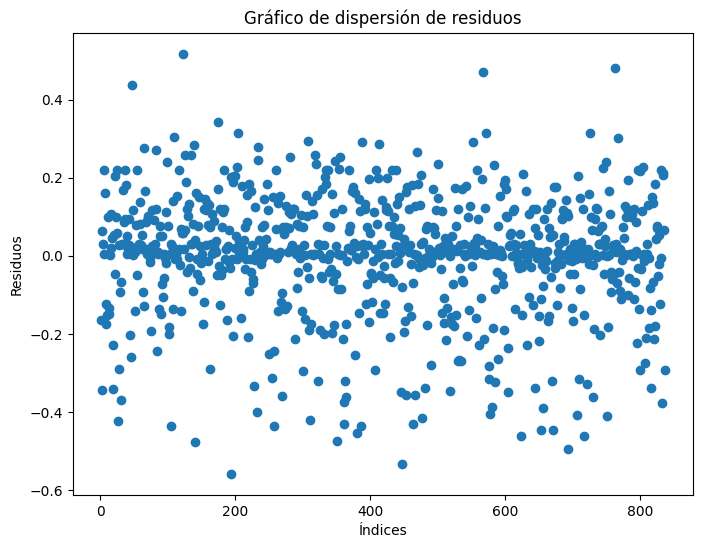

In [46]:
#residuos de la prediccion
residuals = y_train - y_pred_train_bagging.reshape(-1, 1)
indices = list(range(1, len(y_train)+1))

# Crear una figura y ejes
plt.figure(figsize=(8, 6))

# Graficar los residuos
plt.scatter(indices, residuals)

# Agregar etiquetas y título
plt.xlabel('Índices')
plt.ylabel('Residuos')
plt.title('Gráfico de dispersión de residuos')

# Mostrar la gráfica
plt.show()